[🔻] Enter Company Symbol:  NEPSE
[🔻] Enter the Number of days behind to show data:  30


[✅] Fetched New Data from https://nepsealpha.com/trading/chart ==> [(NEPSE) NEPAL STOCK EXCHANGE]
[✅] Displaying Charts...


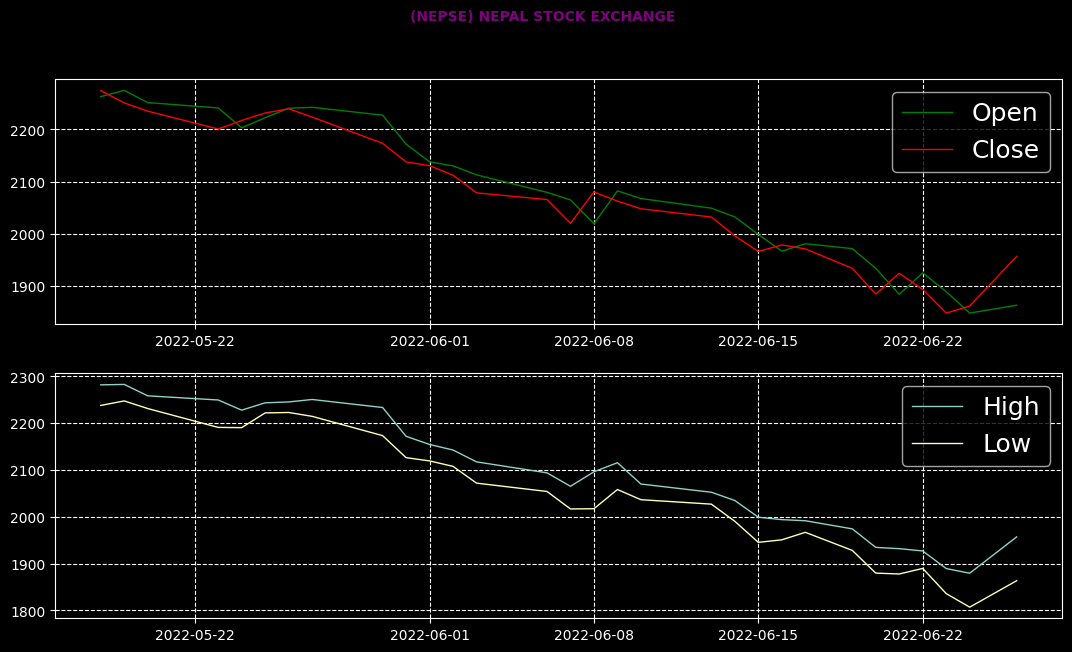

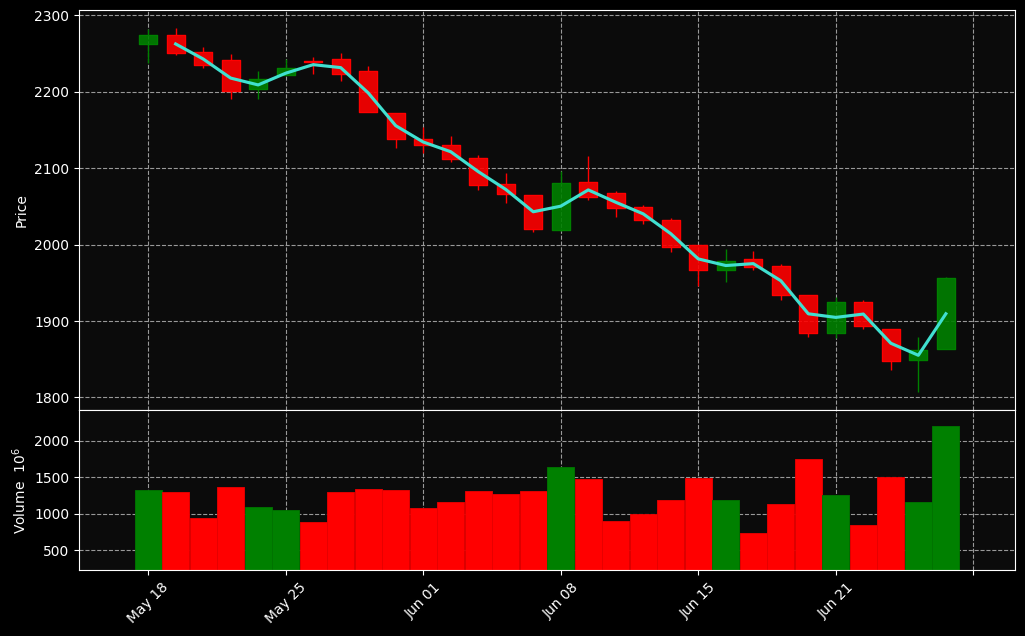

,Open,Close,High,Low,Volume
Date,,,,,
2022-06-26,1863.47,1956.98,1957.09,1863.43,2.196142e+09
2022-06-24,1848.38,1862.06,1879.45,1806.95,1.151208e+09
2022-06-23,1889.40,1848.28,1889.40,1835.88,1.499710e+09
2022-06-22,1925.46,1893.53,1926.99,1889.70,8.437735e+08
2022-06-21,1884.25,1924.74,1931.91,1877.80,1.253758e+09
2022-06-20,1934.03,1884.81,1934.64,1879.69,1.750600e+09
2022-06-19,1971.84,1934.11,1974.22,1928.19,1.134091e+09
2022-06-17,1981.21,1971.36,1991.58,1966.85,7.363122e+08
2022-06-16,1966.89,1978.94,1993.95,1950.76,1.187146e+09


In [5]:
import time
import requests
import json
import datetime
import pandas as pd
import matplotlib.dates as mpldates
import mplfinance as mpl
import matplotlib.pyplot as plt
one_day_to_sec = 24 * 60 * 60
#lists = ['NMB','ADBL','NICA','NEPSE','NIFRA','SBL','NBB','NIB','PCBL','NABIL','SRBL','SANIMA','MEGA','CBL']
def convert_to_csv(stock_data,company,days):
    i = 0
    for date,open,close,high,low,volume in zip(stock_data['t'],stock_data['o'],stock_data['c'],stock_data['h'],stock_data['l'],stock_data['v']):
        
        ts = datetime.datetime.fromtimestamp(date)
        stock_data['t'][i] = ts.strftime('%Y-%m-%d')
        stock_data['o'][i] = float(open)
        stock_data['c'][i] = float(close)
        stock_data['h'][i] = float(high)
        stock_data['l'][i] = float(low)
        stock_data['v'][i] = float(volume)
        
        i += 1

    stock_data['Date'] = stock_data.pop('t')
    stock_data['Open'] = stock_data.pop('o')
    stock_data['Close'] = stock_data.pop('c')
    stock_data['High'] = stock_data.pop('h')
    stock_data['Low'] = stock_data.pop('l')
    stock_data['Volume'] = stock_data.pop('v')
    dataframe =pd.DataFrame(stock_data)
    dataframe.tail(days).to_csv(f'data/{company}_x.csv',index = False)
    

    
def print_graphs(company,company_name,days):
   
    #for company in lists:
    try:
        stock_graph = pd.read_csv(f'data/{company}_x.csv',index_col = 0,parse_dates = True)
    except Exception:
        print(f"[❌] Data not Found for {company}")
        return 
    #display(stock_graph)
    #stock_graph = stock_graph.tail(days)
 
    open = stock_graph["Open"]
    high = stock_graph["High"]
    low = stock_graph["Low"]
    close = stock_graph["Close"]
    plt.style.use('dark_background')
    fig, ax = plt.subplots(2,figsize = (13,7))
    fig.suptitle(f'{company_name}',color='purple',fontsize=10)
   
    print('[✅] Displaying Charts...')
    ax[0].plot(open, c = 'green')
    ax[0].plot(close, c = 'red')
    ax[0].legend(['Open','Close'],fontsize=18)
    ax[1].plot(high)
    ax[1].plot(low)
    ax[1].legend(['High','Low'],fontsize=18)
    
        

       
    mc = mpl.make_marketcolors(up='green',down='red',inherit=True)

        
    s  = mpl.make_mpf_style(base_mpf_style='nightclouds',marketcolors=mc)
    
    mpl.plot(stock_graph,type="candle",mav=(2),figsize=(13,8), style=s,volume = True)#savefig=f'data/{company}_candlestick.png')
    data = stock_graph
     
    display(data.loc[::-1])
        #fig.savefig(f'data/{company}_x.png')
        
try:
    #for company in lists:
    company = input("[🔻] Enter Company Symbol: ").upper()
    days = int(input("[🔻] Enter the Number of days behind to show data: "))
    back_time = time.time() - days * one_day_to_sec
    url = f"https://nepsealpha.com/trading/1/history?symbol={company}&resolution=1D&from={back_time}&to={time.time()}&pass=ok&force=10310&currencyCode=NRS"
    url2 = f"https://nepsealpha.com/ajax/symbols?term={company}"
    dataframe = requests.get(url)
    stock_data = json.loads(dataframe.content)
    
    if stock_data['s'] == 'ok':
        company_name = requests.get(url2)
        company_name = json.loads(company_name.content)
        company_name = company_name[0]['label']
        del stock_data['s']
        convert_to_csv(stock_data,company,days)
        print(f'[✅] Fetched New Data from https://nepsealpha.com/trading/chart ==> [\033[35m{company_name}\033[00m]')
        print_graphs(company=company,company_name = company_name,days = days)
    else:
        print(f"[❌] No Data found for {company}")
        

        
except Exception as ex:
    print('[❌] Could not Fetch New Data , Check your Internet... ')
    print('[✅] Fetchig Previous Data...')
    print_graphs(company=company,company_name = company,days = days)

 

